In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib.animation import FuncAnimation
from PIL import Image

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)


In [2]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

X = mnist["data"].astype(np.float32) / 255.0
y = mnist["target"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (56000, 784) Test: (14000, 784)


In [3]:
def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return (x > 0).astype(float)

def softmax(z):
    z = z - np.max(z, axis=1, keepdims=True)
    exp = np.exp(np.clip(z, -10, 10))
    return exp / np.sum(exp, axis=1, keepdims=True)

def one_hot(y, num_classes):
    oh = np.zeros((y.size, num_classes))
    oh[np.arange(y.size), y] = 1
    return oh

def accuracy(probs, y):
    return np.mean(np.argmax(probs, axis=1) == y)


In [4]:
input_dim = 784
hidden_dim1 = 256
hidden_dim2 = 128
output_dim = 10

lr = 3e-4
epochs = 120
batch_size = 128

W1 = np.random.randn(input_dim, hidden_dim1) * np.sqrt(2 / input_dim)
b1 = np.zeros((1, hidden_dim1))

W2 = np.random.randn(hidden_dim1, hidden_dim2) * np.sqrt(2 / hidden_dim1)
b2 = np.zeros((1, hidden_dim2))

W3 = np.random.randn(hidden_dim2, output_dim) * np.sqrt(2 / hidden_dim2)
b3 = np.zeros((1, output_dim))


In [5]:
y_train_oh = one_hot(y_train, output_dim)

n = X_train.shape[0]
steps = n // batch_size

for ep in range(1, epochs + 1):
    idx = np.random.permutation(n)
    Xs = X_train[idx]
    ys = y_train_oh[idx]

    for i in range(steps):
        xb = Xs[i*batch_size:(i+1)*batch_size]
        yb = ys[i*batch_size:(i+1)*batch_size]

        # forward
        z1 = xb @ W1 + b1
        a1 = relu(z1)

        z2 = a1 @ W2 + b2
        a2 = relu(z2)

        z3 = a2 @ W3 + b3
        probs = softmax(z3)

        # backward
        dz3 = (probs - yb) / xb.shape[0]
        dW3 = a2.T @ dz3
        db3 = dz3.sum(axis=0, keepdims=True)

        da2 = dz3 @ W3.T
        dz2 = da2 * relu_deriv(z2)
        dW2 = a1.T @ dz2
        db2 = dz2.sum(axis=0, keepdims=True)

        da1 = dz2 @ W2.T
        dz1 = da1 * relu_deriv(z1)
        dW1 = xb.T @ dz1
        db1 = dz1.sum(axis=0, keepdims=True)

        # update
        W3 -= lr * dW3
        b3 -= lr * db3
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    test_probs = softmax(
        relu(
            relu(X_test @ W1 + b1) @ W2 + b2
        ) @ W3 + b3
    )

    acc = accuracy(test_probs, y_test)
    print(f"Epoch {ep:03d} | Test Accuracy: {acc*100:.2f}%")


/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/147035762.py:16: RuntimeWarning: divide by zero encountered in matmul
  z1 = xb @ W1 + b1
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/147035762.py:16: RuntimeWarning: overflow encountered in matmul
  z1 = xb @ W1 + b1
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/147035762.py:16: RuntimeWarning: invalid value encountered in matmul
  z1 = xb @ W1 + b1
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/147035762.py:19: RuntimeWarning: divide by zero encountered in matmul
  z2 = a1 @ W2 + b2
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/147035762.py:19: RuntimeWarning: overflow encountered in matmul
  z2 = a1 @ W2 + b2
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/147035762.py:19: RuntimeWarning: invalid value encountered in matmul
  z2 = a1 @ W2 + b2
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/147035762.py:22: RuntimeWa

Epoch 001 | Test Accuracy: 25.61%
Epoch 002 | Test Accuracy: 48.09%
Epoch 003 | Test Accuracy: 59.15%
Epoch 004 | Test Accuracy: 65.82%
Epoch 005 | Test Accuracy: 70.28%
Epoch 006 | Test Accuracy: 73.41%
Epoch 007 | Test Accuracy: 75.94%
Epoch 008 | Test Accuracy: 77.73%
Epoch 009 | Test Accuracy: 79.13%
Epoch 010 | Test Accuracy: 80.60%
Epoch 011 | Test Accuracy: 81.73%
Epoch 012 | Test Accuracy: 82.69%
Epoch 013 | Test Accuracy: 83.46%
Epoch 014 | Test Accuracy: 84.04%
Epoch 015 | Test Accuracy: 84.52%
Epoch 016 | Test Accuracy: 84.99%
Epoch 017 | Test Accuracy: 85.41%
Epoch 018 | Test Accuracy: 85.79%
Epoch 019 | Test Accuracy: 86.00%
Epoch 020 | Test Accuracy: 86.41%
Epoch 021 | Test Accuracy: 86.81%
Epoch 022 | Test Accuracy: 87.06%
Epoch 023 | Test Accuracy: 87.27%
Epoch 024 | Test Accuracy: 87.48%
Epoch 025 | Test Accuracy: 87.63%
Epoch 026 | Test Accuracy: 87.78%
Epoch 027 | Test Accuracy: 87.99%
Epoch 028 | Test Accuracy: 88.16%
Epoch 029 | Test Accuracy: 88.32%
Epoch 030 | Te

In [11]:
_snn_anim = None

def visualize_animated_snn_raster(T=60, decay=0.9, threshold=0.2):
    global _snn_anim

    pil = Image.fromarray((draw_img*255).astype(np.uint8)).resize((28,28))
    x = np.array(pil).astype(np.float32)/255.0
    x = scaler.transform([x.flatten()])[0]

    W1s = W1 / (np.max(np.abs(W1)) + 1e-6) * 0.1
    W2s = W2 / (np.max(np.abs(W2)) + 1e-6) * 0.1

    v1 = np.zeros(W1s.shape[1])
    v2 = np.zeros(W2s.shape[1])

    spike_t, spike_n = [], []

    for t in range(T):
        inp = (np.random.rand(x.size) < x).astype(float)

        v1 = decay*v1 + inp @ W1s
        s1 = (v1 > threshold).astype(float)
        v1[s1 > 0] = 0

        v2 = decay*v2 + s1 @ W2s
        s2 = (v2 > threshold).astype(float)
        v2[s2 > 0] = 0

        for n in np.where(s2 > 0)[0]:
            spike_t.append(t)
            spike_n.append(n)

    if not spike_t:
        print("No spikes detected. Draw darker.")
        return

    fig2, ax2 = plt.subplots(figsize=(8,4))
    ax2.set_xlim(0, T)
    ax2.set_ylim(0, 10)
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Neuron")
    ax2.set_title("SNN Output Spike Raster")

    scat = ax2.scatter([], [], s=40, c="red")

    spike_t = np.array(spike_t)
    spike_n = np.array(spike_n)

    def update(frame):
        m = spike_t <= frame
        scat.set_offsets(np.c_[spike_t[m], spike_n[m]])
        return scat,

    _snn_anim = FuncAnimation(fig2, update, frames=T, interval=120)
    plt.show()


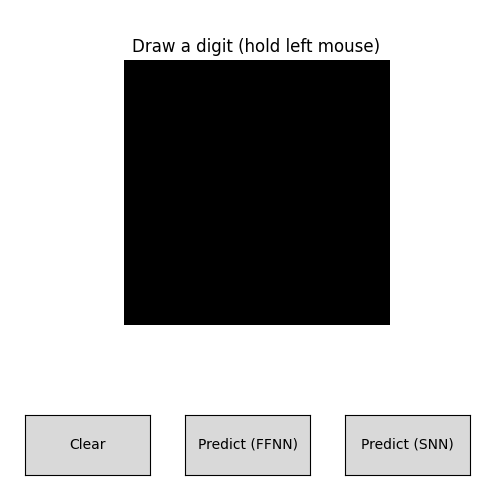

In [12]:
canvas_size = 280
draw_img = np.zeros((canvas_size, canvas_size), dtype=np.float32)

fig, ax = plt.subplots(figsize=(5,5))
plt.subplots_adjust(bottom=0.35)

im = ax.imshow(draw_img, cmap="gray", vmin=0, vmax=1)
ax.set_title("Draw a digit (hold left mouse)")
ax.axis("off")

pred_text = fig.text(
    0.5, 0.22, "",
    ha="center", va="center",
    fontsize=14,
    color="yellow",
    bbox=dict(facecolor="black", alpha=0.7)
)

drawing = False
brush = 8

def draw_at(x, y):
    x, y = int(x), int(y)
    draw_img[max(0,y-brush):y+brush, max(0,x-brush):x+brush] = 1
    im.set_data(draw_img)
    fig.canvas.draw_idle()

def on_press(e):
    global drawing
    if e.inaxes == ax:
        drawing = True
        draw_at(e.xdata, e.ydata)

def on_release(e):
    global drawing
    drawing = False

def on_move(e):
    if drawing and e.inaxes == ax:
        draw_at(e.xdata, e.ydata)

fig.canvas.mpl_connect("button_press_event", on_press)
fig.canvas.mpl_connect("button_release_event", on_release)
fig.canvas.mpl_connect("motion_notify_event", on_move)

def preprocess_draw():
    pil = Image.fromarray((draw_img*255).astype(np.uint8)).resize((28,28))
    arr = np.array(pil).astype(np.float32)/255.0
    return scaler.transform([arr.flatten()])

def clear_canvas(event):
    draw_img[:] = 0
    im.set_data(draw_img)
    pred_text.set_text("")
    fig.canvas.draw_idle()

def predict_ffnn(event):
    x = preprocess_draw()
    a1 = relu(x @ W1 + b1)
    a2 = relu(a1 @ W2 + b2)
    probs = softmax(a2 @ W3 + b3)
    pred = np.argmax(probs)
    conf = probs[0,pred]
    pred_text.set_text(f"FFNN Prediction: {pred} (conf={conf:.2f})")
    fig.canvas.draw_idle()

def predict_snn(event):
    pred_text.set_text("Running SNN…")
    fig.canvas.draw_idle()
    visualize_animated_snn_raster()

clear_ax = fig.add_axes([0.05, 0.05, 0.25, 0.12])
ffnn_ax  = fig.add_axes([0.37, 0.05, 0.25, 0.12])
snn_ax   = fig.add_axes([0.69, 0.05, 0.25, 0.12])

clear_btn = Button(clear_ax, "Clear")
ffnn_btn  = Button(ffnn_ax, "Predict (FFNN)")
snn_btn   = Button(snn_ax, "Predict (SNN)")

clear_btn.on_clicked(clear_canvas)
ffnn_btn.on_clicked(predict_ffnn)
snn_btn.on_clicked(predict_snn)

plt.show()


/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/2025586782.py:21: RuntimeWarning: divide by zero encountered in matmul
  v1 = decay*v1 + inp @ W1s
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/2025586782.py:21: RuntimeWarning: overflow encountered in matmul
  v1 = decay*v1 + inp @ W1s
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/2025586782.py:21: RuntimeWarning: invalid value encountered in matmul
  v1 = decay*v1 + inp @ W1s
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/2025586782.py:25: RuntimeWarning: divide by zero encountered in matmul
  v2 = decay*v2 + s1 @ W2s
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/2025586782.py:25: RuntimeWarning: overflow encountered in matmul
  v2 = decay*v2 + s1 @ W2s
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/2025586782.py:25: RuntimeWarning: invalid value encountered in matmul
  v2 = decay*v2 + s1 @ W2s


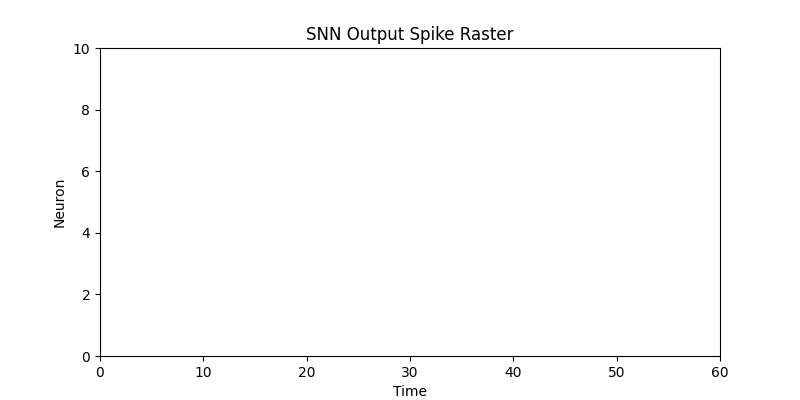

In [31]:
visualize_animated_snn_raster()


In [32]:
def snn_spike_counts_from_draw(T=60, decay=0.9, threshold=0.3):
    # preprocess drawing
    pil = Image.fromarray((draw_img * 255).astype(np.uint8)).resize((28,28))
    x = np.array(pil).astype(np.float32) / 255.0
    x = scaler.transform([x.flatten()])[0]

    # ---- SAFE weight scaling ----
    W1s = W1 / (np.max(np.abs(W1)) + 1e-6) * 0.05
    W2s = W2 / (np.max(np.abs(W2)) + 1e-6) * 0.05
    W3s = W3 / (np.max(np.abs(W3)) + 1e-6) * 0.05

    # membrane potentials
    v1 = np.zeros(W1s.shape[1])   # 256
    v2 = np.zeros(W2s.shape[1])   # 128
    v3 = np.zeros(W3s.shape[1])   # 10  ✅ OUTPUT

    spike_counts = np.zeros(10, dtype=int)

    for _ in range(T):
        # Poisson encoding
        inp = (np.random.rand(x.size) < x).astype(float)

        # Layer 1
        v1 = decay * v1 + inp @ W1s
        s1 = (v1 > threshold).astype(float)
        v1[s1 > 0] = 0

        # Layer 2
        v2 = decay * v2 + s1 @ W2s
        s2 = (v2 > threshold).astype(float)
        v2[s2 > 0] = 0

        # Output layer (THIS is what we count)
        v3 = decay * v3 + s2 @ W3s
        s3 = (v3 > threshold).astype(float)
        v3[s3 > 0] = 0

        spike_counts += s3.astype(int)

    return spike_counts


In [33]:
def plot_snn_spike_bar():
    counts = snn_spike_counts_from_draw()

    plt.figure(figsize=(7,3))
    plt.bar(range(10), counts, color="crimson")
    plt.xlabel("Digit (Output Neuron)")
    plt.ylabel("Spike Count")
    plt.title("SNN Decision via Spike Counts")

    pred = np.argmax(counts)
    plt.text(pred, counts[pred] + 0.5, f"← Pred {pred}",
             ha="center", fontsize=10)

    plt.show()
    print("SNN predicted digit:", pred)


/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/1033287503.py:24: RuntimeWarning: divide by zero encountered in matmul
  v1 = decay * v1 + inp @ W1s
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/1033287503.py:24: RuntimeWarning: overflow encountered in matmul
  v1 = decay * v1 + inp @ W1s
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/1033287503.py:24: RuntimeWarning: invalid value encountered in matmul
  v1 = decay * v1 + inp @ W1s
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/1033287503.py:29: RuntimeWarning: divide by zero encountered in matmul
  v2 = decay * v2 + s1 @ W2s
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/1033287503.py:29: RuntimeWarning: overflow encountered in matmul
  v2 = decay * v2 + s1 @ W2s
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/1033287503.py:29: RuntimeWarning: invalid value encountered in matmul
  v2 = decay * v2 + s1 @ W2s
/var/folders/xj/btcj4x1d53l

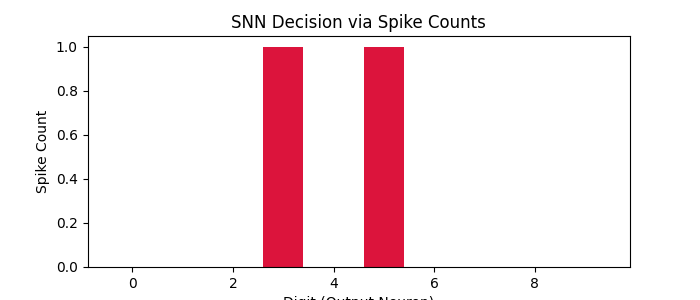

SNN predicted digit: 3


In [36]:
plot_snn_spike_bar()


In [37]:
def compare_ann_snn():
    pil = Image.fromarray((draw_img*255).astype(np.uint8)).resize((28,28))
    img = np.array(pil).astype(np.float32)/255.0
    x = scaler.transform([img.flatten()])

    # ANN
    a1 = relu(x @ W1 + b1)
    a2 = relu(a1 @ W2 + b2)
    probs = softmax(a2 @ W3 + b3)
    ann_pred = np.argmax(probs)

    # SNN
    spike_counts = snn_spike_counts_from_draw()
    snn_pred = np.argmax(spike_counts)

    fig, axs = plt.subplots(1,3, figsize=(12,3))

    axs[0].imshow(img, cmap="gray")
    axs[0].set_title("Input Digit")
    axs[0].axis("off")

    axs[1].bar(range(10), probs.flatten())
    axs[1].set_title(f"FFNN → {ann_pred}")

    axs[2].bar(range(10), spike_counts, color="crimson")
    axs[2].set_title(f"SNN → {snn_pred}")

    plt.suptitle("ANN vs SNN Decision Comparison")
    plt.show()


/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/2628724299.py:7: RuntimeWarning: divide by zero encountered in matmul
  a1 = relu(x @ W1 + b1)
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/2628724299.py:7: RuntimeWarning: overflow encountered in matmul
  a1 = relu(x @ W1 + b1)
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/2628724299.py:7: RuntimeWarning: invalid value encountered in matmul
  a1 = relu(x @ W1 + b1)
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/2628724299.py:8: RuntimeWarning: divide by zero encountered in matmul
  a2 = relu(a1 @ W2 + b2)
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/2628724299.py:8: RuntimeWarning: overflow encountered in matmul
  a2 = relu(a1 @ W2 + b2)
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykernel_7386/2628724299.py:8: RuntimeWarning: invalid value encountered in matmul
  a2 = relu(a1 @ W2 + b2)
/var/folders/xj/btcj4x1d53l_g0qq5_tp68q80000gn/T/ipykerne

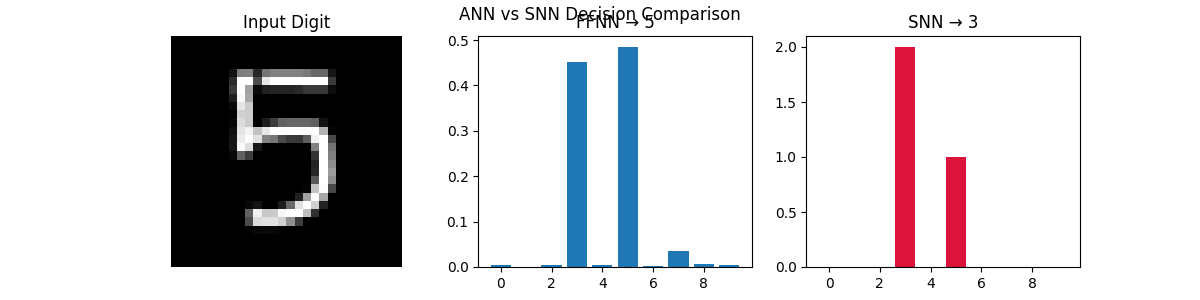

In [42]:
compare_ann_snn()
